<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/HangboardProgress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!ls

sample_data  TrevorHB.xlsx


In [0]:
import pandas as pd
# df = pd.read_excel('MorganHB1.xlsx')
df = pd.read_excel('TrevorHB.xlsx')

In [51]:
df

,date,jug,imr,med_edge,pinch_med,mr_2fp,large_edge,pinch_wide,sloper,mrp_3fp
0,26 Oct 2019,"0,6","-20,6","-45,6","-60,6","-50,6","-45,6","-55,6","-35,6","-45,6"
1,2019-10-29 00:00:00,"0,6","-17.5,5,5","-42.5,6","-57.5,6","-47.5,6","-42.5,6","-52.5,6","-32.5,6","-42.5,6"
2,2019-11-01 00:00:00,"0,6","-27.5,6","-40,6","-55,6","-45,6","-35,6","-50,6","-30,4,9,7","-40,5,6"
3,2019-11-04 00:00:00,"0,6","-27.5,6","-40,6","-55,6","-45,6","-35,6","-50,6","-30,6","-40,6"
4,2019-11-07 00:00:00,"0,6","-25,6","-37.5,6","-55,6","-42.5,6","-32.5,6","-47.5,6","-27.5,5,8","-37.5,5,9.5"
5,2019-11-10 00:00:00,"0,6","-22.5,6","-35,6","-52.5,6","-40,6","-30,6","-45,3,3,6","-25,4,5,8","-35,5,7"
6,2019-11-13 00:00:00,"0,6","-20,6","-32.5,6","-50,3,6,6,6","-37.5,6","-27.5,5,9","-42.5,3,9,6,7","-22.5,3,8,7,6","-32.5,4,8,7"
7,8 Feb 2020,"0,6","-30,6","-42.5,6","-57.5,6","-47.5,6","-37.5,6","-52.5,5,6","-32.5,3,9,6,8","-42.5,5,6"
8,11 Feb 2020,"0,6","-30,6","-42.5,6","-57.5,6","-47.5,6","-37.5,6","-52.5,6","-32.5,6","-42.5,6"
9,14 Feb 2020,"0,6","-27.5,6","-40,6","-57.5,6","-45,6","-35,6","-52.5,6","-30,5,7","-40,6"


In [0]:
df.date = pd.to_datetime(df.date)
df.date = pd.to_datetime(df.date, format = '%d %b %Y')

In [58]:
df = df.set_index('date')
df

,jug,imr,med_edge,pinch_med,mr_2fp,large_edge,pinch_wide,sloper,mrp_3fp
date,,,,,,,,,
2019-10-26,"0,6","-20,6","-45,6","-60,6","-50,6","-45,6","-55,6","-35,6","-45,6"
2019-10-29,"0,6","-17.5,5,5","-42.5,6","-57.5,6","-47.5,6","-42.5,6","-52.5,6","-32.5,6","-42.5,6"
2019-11-01,"0,6","-27.5,6","-40,6","-55,6","-45,6","-35,6","-50,6","-30,4,9,7","-40,5,6"
2019-11-04,"0,6","-27.5,6","-40,6","-55,6","-45,6","-35,6","-50,6","-30,6","-40,6"
2019-11-07,"0,6","-25,6","-37.5,6","-55,6","-42.5,6","-32.5,6","-47.5,6","-27.5,5,8","-37.5,5,9.5"
2019-11-10,"0,6","-22.5,6","-35,6","-52.5,6","-40,6","-30,6","-45,3,3,6","-25,4,5,8","-35,5,7"
2019-11-13,"0,6","-20,6","-32.5,6","-50,3,6,6,6","-37.5,6","-27.5,5,9","-42.5,3,9,6,7","-22.5,3,8,7,6","-32.5,4,8,7"
2020-02-08,"0,6","-30,6","-42.5,6","-57.5,6","-47.5,6","-37.5,6","-52.5,5,6","-32.5,3,9,6,8","-42.5,5,6"
2020-02-11,"0,6","-30,6","-42.5,6","-57.5,6","-47.5,6","-37.5,6","-52.5,6","-32.5,6","-42.5,6"


In [59]:
cols = list(df.columns)
cols

['jug',
 'imr',
 'med_edge',
 'pinch_med',
 'mr_2fp',
 'large_edge',
 'pinch_wide',
 'sloper',
 'mrp_3fp']

In [60]:
hangs = []
for col in cols:
  print('\n\n',col)
  column = df[col]
  inner_df = column.str.split(',', expand=True).fillna(0) # looks like an error happens if I don't first do this, pardon the redundancy
  if len(inner_df.columns) == 2:
    inner_df[2] = 0
    inner_df[3] = 60
  else:
    inner_df.insert(2, 'Mikayla', 6 - inner_df[1].apply(pd.to_numeric))
    inner_df.insert(3, 'smells', 10*inner_df[1].apply(pd.to_numeric) + (inner_df.iloc[:,3:]).apply(pd.to_numeric).sum(axis=1))
    inner_df = inner_df.iloc[:,:4]
  inner_df.columns = ['weight','success','fail','TUT']
  inner_df = inner_df[['weight','success','fail','TUT']]
  inner_df = inner_df.apply(pd.to_numeric) # change to numeric columns
  inner_df.TUT = inner_df.TUT/60 # change TUT (Time under tension to a fraction of 60 seconds later for coloring)
  hang = inner_df[['weight','TUT']]
  hang.index.name = 'Date'
  hang = hang.reset_index()
  print(hang)
  hangs.append(hang)



 jug
         Date  weight  TUT
0  2019-10-26       0  1.0
1  2019-10-29       0  1.0
2  2019-11-01       0  1.0
3  2019-11-04       0  1.0
4  2019-11-07       0  1.0
5  2019-11-10       0  1.0
6  2019-11-13       0  1.0
7  2020-02-08       0  1.0
8  2020-02-11       0  1.0
9  2020-02-14       0  1.0
10 2020-02-18       0  1.0
11 2020-02-21       0  1.0
12 2020-02-24       0  1.0
13 2020-02-27       0  1.0
14 2020-02-29       0  1.0
15 2020-03-04       0  1.0


 imr
         Date  weight       TUT
0  2019-10-26   -20.0  1.000000
1  2019-10-29   -17.5  0.916667
2  2019-11-01   -27.5  1.000000
3  2019-11-04   -27.5  1.000000
4  2019-11-07   -25.0  1.000000
5  2019-11-10   -22.5  1.000000
6  2019-11-13   -20.0  1.000000
7  2020-02-08   -30.0  1.000000
8  2020-02-11   -30.0  1.000000
9  2020-02-14   -27.5  1.000000
10 2020-02-18   -25.0  1.000000
11 2020-02-21   -25.0  1.000000
12 2020-02-24   -22.5  1.000000
13 2020-02-27   -20.0  1.000000
14 2020-02-29   -17.5  1.000000
15 2020-03-04  

In [61]:
for hang in hangs:
  print(hang.weight)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: weight, dtype: int64
0    -20.0
1    -17.5
2    -27.5
3    -27.5
4    -25.0
5    -22.5
6    -20.0
7    -30.0
8    -30.0
9    -27.5
10   -25.0
11   -25.0
12   -22.5
13   -20.0
14   -17.5
15   -15.0
Name: weight, dtype: float64
0    -45.0
1    -42.5
2    -40.0
3    -40.0
4    -37.5
5    -35.0
6    -32.5
7    -42.5
8    -42.5
9    -40.0
10   -37.5
11   -37.5
12   -35.0
13   -32.5
14   -30.0
15   -27.5
Name: weight, dtype: float64
0    -60.0
1    -57.5
2    -55.0
3    -55.0
4    -55.0
5    -52.5
6    -50.0
7    -57.5
8    -57.5
9    -57.5
10   -57.5
11   -57.5
12   -55.0
13   -55.0
14   -52.5
15   -52.5
Name: weight, dtype: float64
0    -50.0
1    -47.5
2    -45.0
3    -45.0
4    -42.5
5    -40.0
6    -37.5
7    -47.5
8    -47.5
9    -45.0
10   -42.5
11   -42.5
12   -40.0
13   -37.5
14   -35.0
15   -32.5
Name: weight, dtype: float64
0    -45.0
1    -42.5
2  

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [81]:
fig = go.Figure()

ending_weights = []

for hang in hangs:
  ending_weight = hang.weight.to_list()[-1]
  ending_weights.append(ending_weight)
  fig.add_trace(go.Scatter(x=hang.index, y=hang.weight, mode='lines+markers'))

# Adding labels
annotations = []
for ending_weight, col in zip(ending_weights, cols):
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=1, y=ending_weight,
                                  xanchor='left', yanchor='middle',
                                  text=f'{col}',
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Hangboard Progress',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,
                  showlegend=False, # alternatively can show legend (default to True) and remove label on right
                  xaxis = dict(
                      tickmode = 'array',
                      tickvals = hang.index,
                      ticktext = hang.Date,
                      tickformat = '%y/%m'
                      ),
                  yaxis = dict(
                      tickmode = 'array',
                      title = 'weight (lbs from body weight)'
                      ))

fig.show()

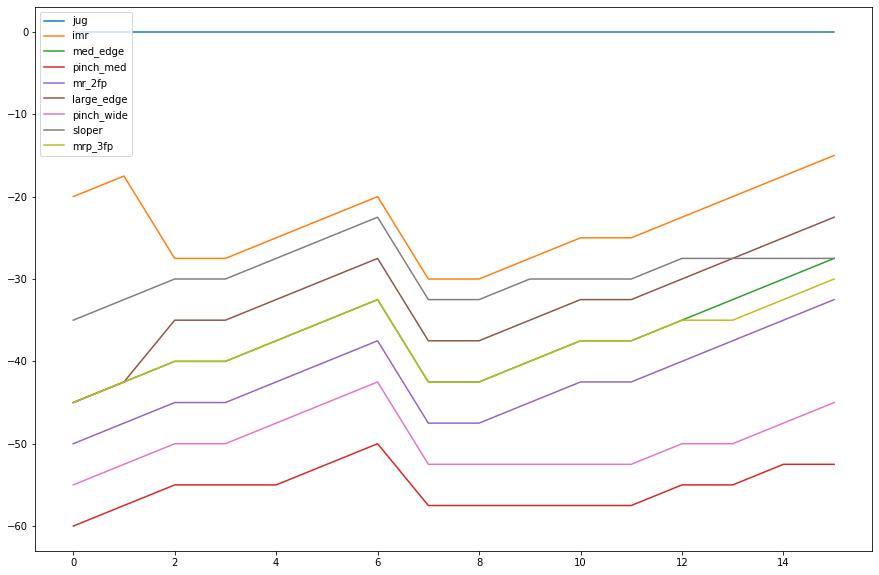

In [69]:
plt.figure(figsize=(15,10))
for hang in hangs:
  plt.plot(hang.index, hang.weight)

plt.legend(cols)
plt.show();